In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector

### Genearting a random state psi 

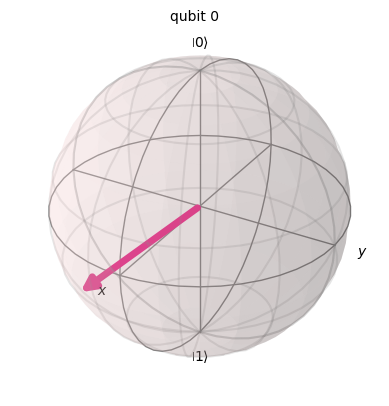

In [3]:
q0 = random_statevector(dims=2, seed=14)
plot_bloch_multivector(q0)

### Creating Init gate
#### The init gate is an operator like measurement, which is used to initialize the qubit to a specific state. Here the init gate is used to initialize the qubit to the state `q0` that we randomly generated.

In [4]:
init_gate = Initialize(q0)
init_gate.label = 'init'

In [5]:
qr = QuantumRegister(3, name='q')
c1 = ClassicalRegister(1, name='m')
c2 = ClassicalRegister(1, name='n')
qc = QuantumCircuit(qr, c1, c2)

### Appending `init_gate` to the circuit

In [6]:
qc.append(init_gate, [0])  #This means append init to qubit 0
qc.barrier()
qc.draw()

┌──────────────────────────────────────────┐ ░ 
q_0: ┤ init(0.19692-0.44551j,-0.27732-0.82815j) ├─░─
     └──────────────────────────────────────────┘ ░ 
q_1: ─────────────────────────────────────────────░─
                                                  ░ 
q_2: ─────────────────────────────────────────────░─
                                                  ░ 
m: 1/═══════════════════════════════════════════════
                                                    
n: 1/═══════════════════════════════════════════════

### Creating Bell Pair 

In [7]:
qc.h(1)
qc.cx(1, 2)
qc.barrier()
qc.draw()

┌──────────────────────────────────────────┐ ░            ░ 
q_0: ┤ init(0.19692-0.44551j,-0.27732-0.82815j) ├─░────────────░─
     └──────────────────────────────────────────┘ ░ ┌───┐      ░ 
q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─
                                                  ░ └───┘┌─┴─┐ ░ 
q_2: ─────────────────────────────────────────────░──────┤ X ├─░─
                                                  ░      └───┘ ░ 
m: 1/════════════════════════════════════════════════════════════
                                                                 
n: 1/════════════════════════════════════════════════════════════

### Performing Quantum Teleportation

In [8]:
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.draw()

┌──────────────────────────────────────────┐ ░            ░      ┌───┐ ░ 
q_0: ┤ init(0.19692-0.44551j,-0.27732-0.82815j) ├─░────────────░───■──┤ H ├─░─
     └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ 
q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─
                                                  ░ └───┘┌─┴─┐ ░ └───┘      ░ 
q_2: ─────────────────────────────────────────────░──────┤ X ├─░────────────░─
                                                  ░      └───┘ ░            ░ 
m: 1/═════════════════════════════════════════════════════════════════════════
                                                                              
n: 1/═════════════════════════════════════════════════════════════════════════

### Measuring the qubits
#### The qubits are measured and the results are stored in the classical bits `c1` and `c2`.
##### When the circuit was created the classical registers were created with the names `c1` and `c2` and passed to the circuit like this `QuantumCircuit(qr, c1, c2)`
##### When we call measure on the qubits, measure works like this `measure(which_qubit_to_measure, which_classical_bit_to_store_in)`

In [9]:
qc.measure(0, 0)
qc.measure(1, 1)
qc.barrier()
qc.draw()

┌──────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
q_0: ┤ init(0.19692-0.44551j,-0.27732-0.82815j) ├─░────────────░───■──┤ H ├─░─»
     └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                  ░ └───┘┌─┴─┐ ░ └───┘      ░ »
q_2: ─────────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                  ░      └───┘ ░            ░ »
m: 1/═════════════════════════════════════════════════════════════════════════»
                                                                              »
n: 1/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐    ░ 
«q_0: ┤M├────░─
«     └╥┘┌─┐ ░ 
«q_1: ─╫─┤M├─░─
«      ║ └╥┘ ░ 
«q_2: ─╫──╫──░─
«      ║  ║  ░ 
«m: 1/═╩══╬════
«      0  ║    
«n: 1/════╩════
«         0

### Defining Bob's gates
#### Here we apply the `x` gate if `c2` is equal to 1 or the `z` gate if `c1` is equal to 1 or both if both are equal to 1.


In [10]:
qc.x(2).c_if(c2, 1)
qc.z(2).c_if(c1, 1)
qc.draw()

┌──────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
q_0: ┤ init(0.19692-0.44551j,-0.27732-0.82815j) ├─░────────────░───■──┤ H ├─░─»
     └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                  ░ └───┘┌─┴─┐ ░ └───┘      ░ »
q_2: ─────────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                  ░      └───┘ ░            ░ »
m: 1/═════════════════════════════════════════════════════════════════════════»
                                                                              »
n: 1/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐    ░               
«q_0: ┤M├────░───────────────
«     └╥┘┌─┐ ░               
«q_1: ─╫─┤M├─░───────────────
«      ║ └╥┘ ░  ┌───┐  ┌───┐ 
«q_2: ─╫──╫──░──┤ X ├──┤ Z ├─
«      ║  ║  ░  └─╥─┘  └─╥─┘ 
«      ║  ║       ║   ┌──╨──┐
«m: 1/═╩══╬═══════╬═══╡ 0x1 ╞
«      0  ║    ┌──╨──┐└─────┘
«n: 1/════╩════╡ 0x1 ╞═══════
«         0    └─────┘

#### Using State vector simulator and plotting the results

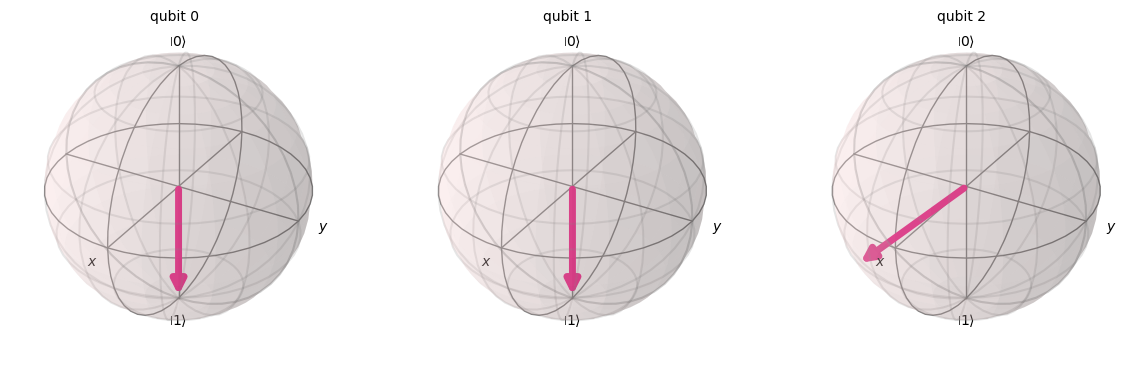

In [11]:
simulator = StatevectorSimulator()
transpiled_circuit = transpile(qc, simulator)
result = simulator.run(transpiled_circuit, shots=100).result()
state_res = result.get_statevector(qc)
plot_bloch_multivector(state_res)

### Using QASM simulator
#### We can use the QASM simulator that emulates a real quantum computer to run the circuit and get the results but we have to modify the code a bit.
##### On a real quantum computer, we will not be able to sample the state vectors.
##### We add an inverse init gate at the end aka a disentangler.

#### Initializing the random state psi

In [ ]:
q_0 = random_statevector(dims=2)
plot_bloch_multivector(q_0)

In [3]:
init_gate = Initialize(q_0)
init_gate.label = 'init'

In [4]:
#Only these steps will be different for QASM simulator
inverse_init = init_gate.gates_to_uncompute() 

#### The circuit and gates will reamin the same but we will add the disentangler at the end.
###### The draw function is removed at the end of every chunk

In [5]:
# Circuit and registers
q_r = QuantumRegister(3, name='q')
c_1 = ClassicalRegister(1, name='m')
c_2 = ClassicalRegister(1, name='n')
q_c = QuantumCircuit(q_r, c_1, c_2)

# Appending init
q_c.append(init_gate, [0])  #This means append init to qubit 0
q_c.barrier()


#Creating bell pair
q_c.h(1)
q_c.cx(1, 2)
q_c.barrier()


#Performing quantum teleportation
q_c.cx(0, 1)
q_c.h(0)
q_c.barrier()


# Measuring the qubits
q_c.measure(0, 0)
q_c.measure(1, 1)
q_c.barrier()

#Bob's Gates
q_c.x(2).c_if(c_2, 1)
q_c.z(2).c_if(c_1, 1)

# New step: Appending inverse init
q_c.append(inverse_init, [2])
q_c.draw()

┌───────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
q_0: ┤ init(-0.013742+0.88595j,-0.4329+0.16583j) ├─░────────────░───■──┤ H ├─░─»
     └───────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
q_1: ──────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                   ░ └───┘┌─┴─┐ ░ └───┘      ░ »
q_2: ──────────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                   ░      └───┘ ░            ░ »
m: 1/══════════════════════════════════════════════════════════════════════════»
                                                                               »
n: 1/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌─┐    ░                               
«q_0: ┤M├────░───────────────────────────────
«     └╥┘┌─┐ ░                               
«q_1: ─╫─┤M├─░───────────────────────────────
«      ║ └╥┘ ░  ┌───┐  ┌───┐ ┌──────────────┐
«q_2: ─╫──╫──░──┤ X ├──┤ Z ├─┤ disentangler ├
«      ║  ║  ░  └─╥─┘  └─╥─┘ └──────────────┘
«      ║  ║       ║   ┌──╨──┐                
«m: 1/═╩══╬═══════╬═══╡ 0x1 ╞════════════════
«      0  ║    ┌──╨──┐└─────┘                
«n: 1/════╩════╡ 0x1 ╞═══════════════════════
«         0    └─────┘

#### We need an additional classical bit to store the result of the disentangler

In [6]:
result_bit = ClassicalRegister(1)
q_c.add_register(result_bit)
q_c.measure(2, 2) #here we have 3 classical registers now 0, 1 and 2 so we're storing the result in the newly added classical register
q_c.draw()

┌───────────────────────────────────────────┐ ░            ░      ┌───┐»
 q_0: ┤ init(-0.013742+0.88595j,-0.4329+0.16583j) ├─░────────────░───■──┤ H ├»
      └───────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
 q_1: ──────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                    ░ └───┘┌─┴─┐ ░ └───┘     »
 q_2: ──────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                    ░      └───┘ ░           »
 m: 1/═══════════════════════════════════════════════════════════════════════»
                                                                             »
 n: 1/═══════════════════════════════════════════════════════════════════════»
                                                                             »
c0: 1/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«       ░ ┌─┐    ░                                  
« q_0: ─░─┤M├────░──────────────────────────────────
«       ░ └╥┘┌─┐ ░                                  
« q_1: ─░──╫─┤M├─░──────────────────────────────────
«       ░  ║ └╥┘ ░  ┌───┐  ┌───┐ ┌──────────────┐┌─┐
« q_2: ─░──╫──╫──░──┤ X ├──┤ Z ├─┤ disentangler ├┤M├
«       ░  ║  ║  ░  └─╥─┘  └─╥─┘ └──────────────┘└╥┘
«          ║  ║       ║   ┌──╨──┐                 ║ 
« m: 1/════╩══╬═══════╬═══╡ 0x1 ╞═════════════════╬═
«          0  ║    ┌──╨──┐└─────┘                 ║ 
« n: 1/═══════╩════╡ 0x1 ╞════════════════════════╬═
«             0    └─────┘                        ║ 
«c0: 1/═══════════════════════════════════════════╩═
«                                                 0

#### Measuring qasm simulator and plotting the results

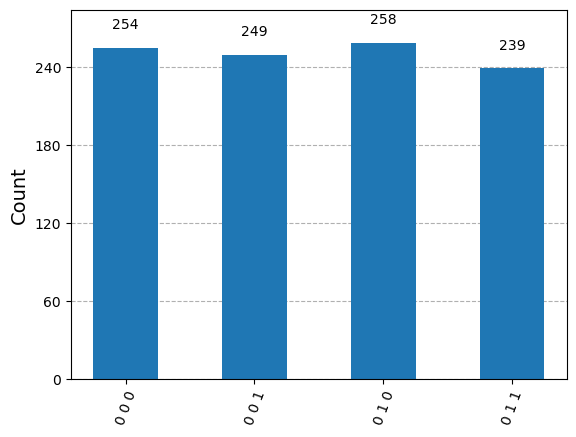

In [7]:
qasm_simulator = AerSimulator()
qasm_transpiled = transpile(q_c, qasm_simulator)
qasm_result = qasm_simulator.run(qasm_transpiled, shots=1000).result().get_counts()
plot_histogram(qasm_result)


#### Results explained
The bits are read as `q2` `q1` `q0`. Example `010` means `q2` is 0, `q1` is 1 and `q0` is 0.